In [ ]:
# Google Colab Notebook for Breast Cancer Classification using SVM

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectFromModel

# Load the Breast Cancer Wisconsin dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into 70% Training and 30% Testing, ensuring class distribution is maintained
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Preprocess the data: Use StandardScaler to normalize feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM model using sklearn.svm.SVC with default parameters
svm = SVC()
svm.fit(X_train, y_train)

# Perform Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf', 'poly']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_params = grid.best_params_
print(f"Best parameters from GridSearchCV: {best_params}")

# Evaluate the trained model
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Identify the most important features using SelectFromModel with LinearSVC
linear_svc = LinearSVC(C=0.01, penalty='l1', dual=False, max_iter=2000)
linear_svc.fit(X_train, y_train)
model = SelectFromModel(linear_svc, prefit=True)
important_features = model.get_support(indices=True)
print(f"Important features indices: {important_features}")

# Generate a confusion matrix and calculate F1-score, Precision, Recall, False Alarm Rate
conf_matrix = confusion_matrix(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
false_alarm_rate = conf_matrix[0][1] / (conf_matrix[0][0] + conf_matrix[0][1])

print(f"Confusion Matrix:\n{conf_matrix}")
print(f"F1-score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"False Alarm Rate: {false_alarm_rate}")

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.963 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.96
Confusion Matrix:
[[41  2]
 [ 3 68]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Load the dataset
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Split the dataset into training and testing sets, ensuring class distribution is maintained
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.98
Confusion Matrix:
[[ 62   2]
 [  1 106]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        64
           1       0.98      0.99      0.99       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [ ]:
# prompt: Load the dataset using sklearn.datasets.load_breast_cancer(). and create a table that will show all the data

import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()

# Create a pandas DataFrame from the dataset
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Display the DataFrame
df


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


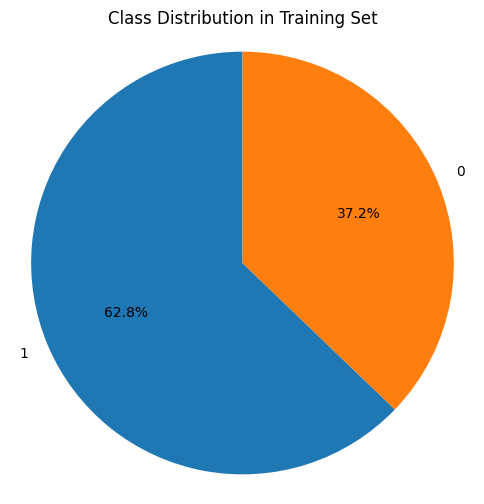

In [ ]:
# prompt: given the table above can you create a graphical pi chart that will: Split the dataset into 70% Training and 30% Testing, ensuring class distribution is maintained
# (use stratify=y in train_test_split).

import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'y' is your target variable (0 or 1)
# and you've already split the data into X_train, X_test, y_train, y_test

# Count the occurrences of each class in the training set
class_counts = pd.Series(y_train).value_counts()

# Create the pie chart
plt.figure(figsize=(6, 6))  # Adjust figure size as needed
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution in Training Set')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0         11.620         18.18           76.38      408.8          0.11750   
1         11.200         29.37           70.67      386.0          0.07449   
2         10.570         18.32           66.82      340.9          0.08142   
3         12.760         18.84           81.87      496.6          0.09676   
4         11.290         13.04           72.23      388.0          0.09834   
..           ...           ...             ...        ...              ...   
393       15.280         22.41           98.92      710.6          0.09057   
394       19.530         18.90          129.50     1217.0          0.11500   
395       13.650         13.16           87.88      568.9          0.09646   
396       17.050         19.08          113.40      895.0          0.11410   
397        9.904         18.06           64.60      302.4          0.09699   

     mean compactness  mean concavity  mean concave points  mea

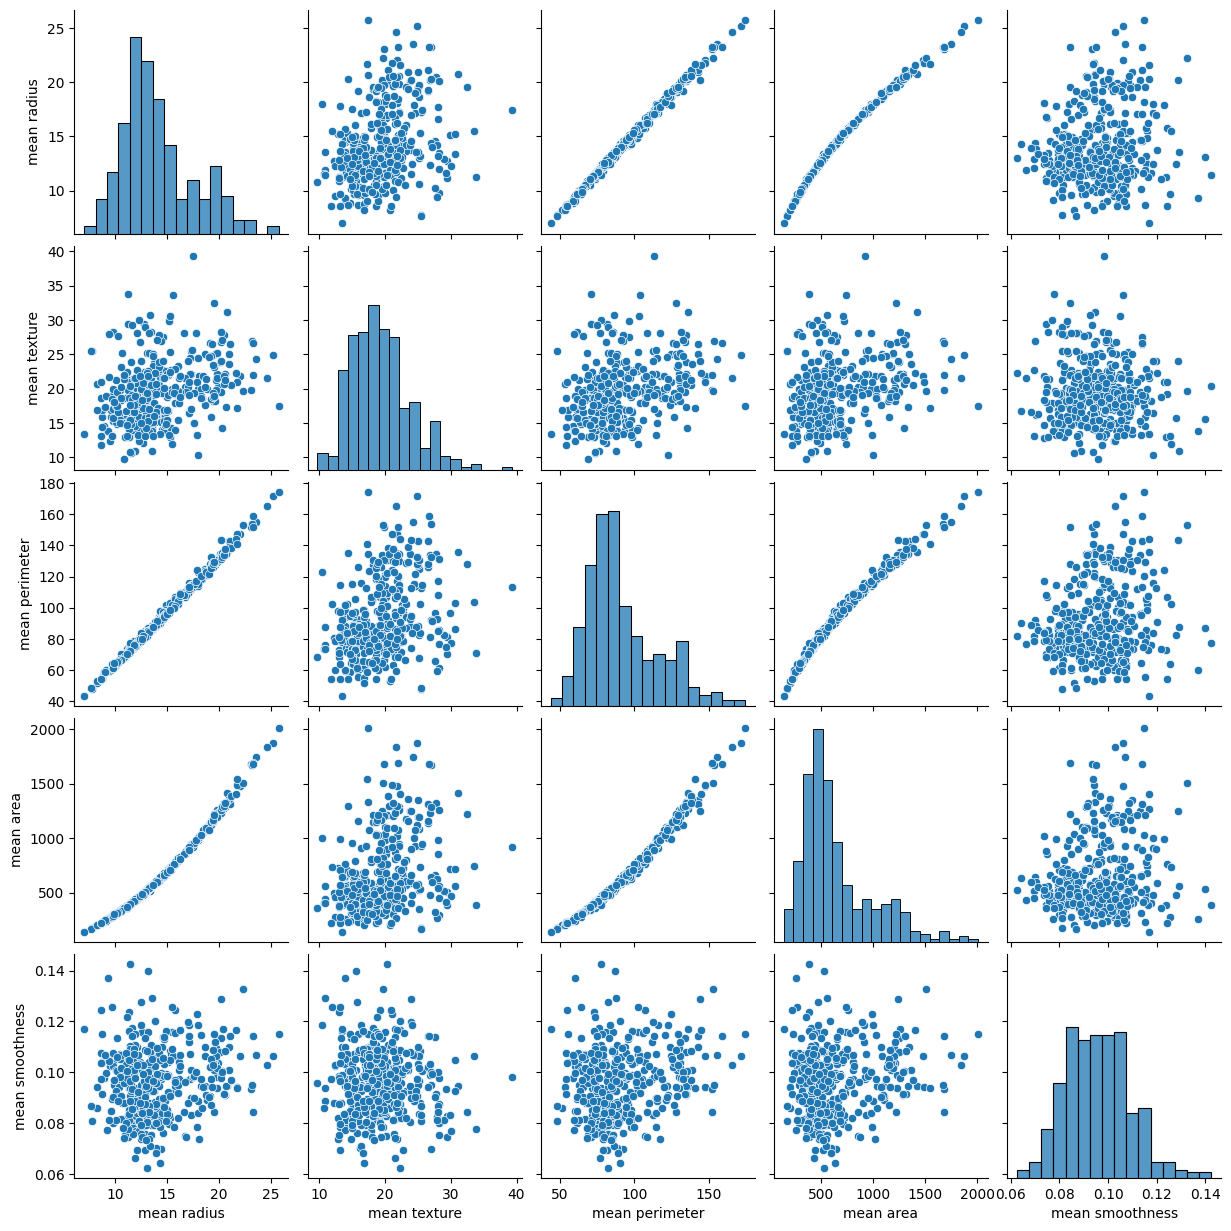

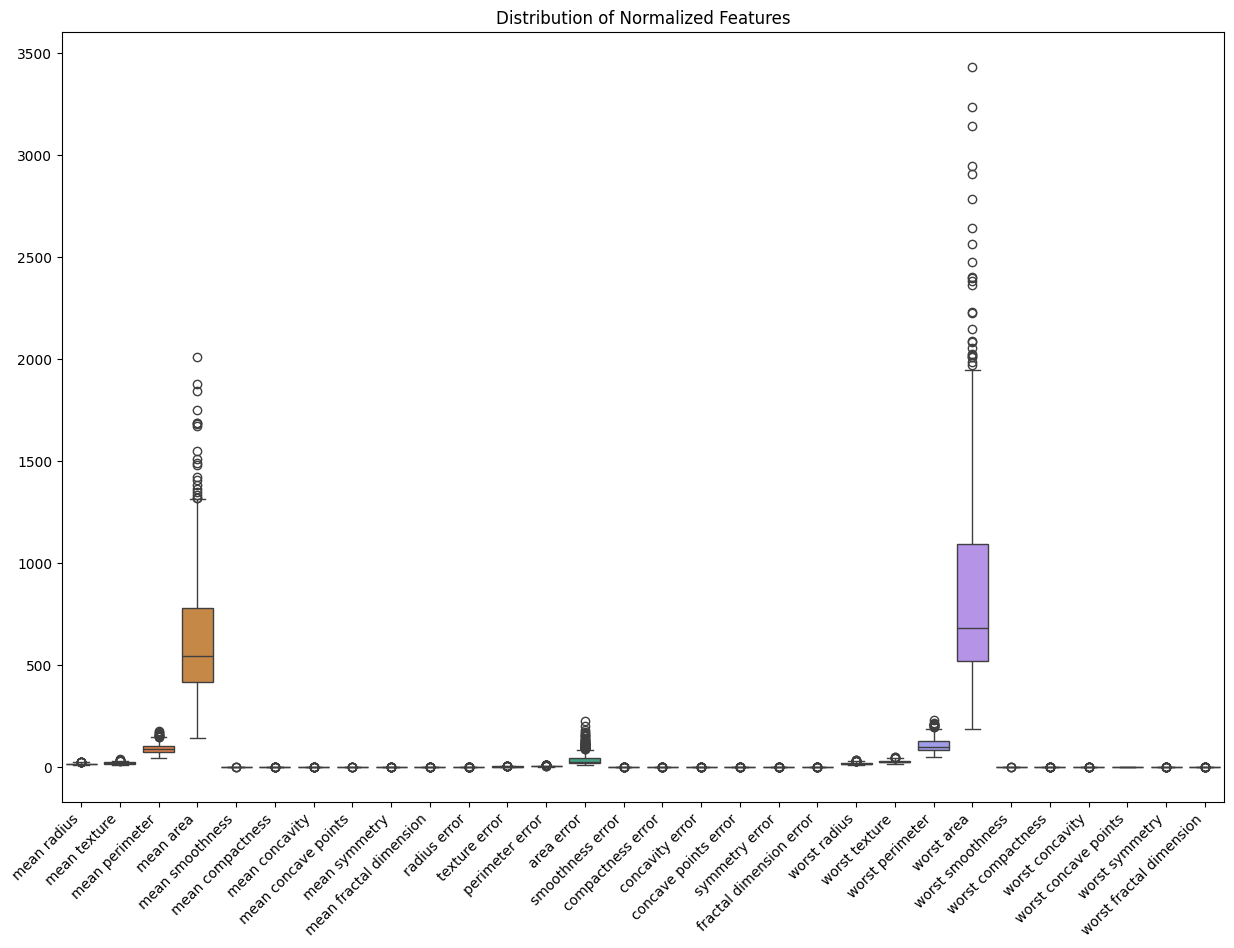

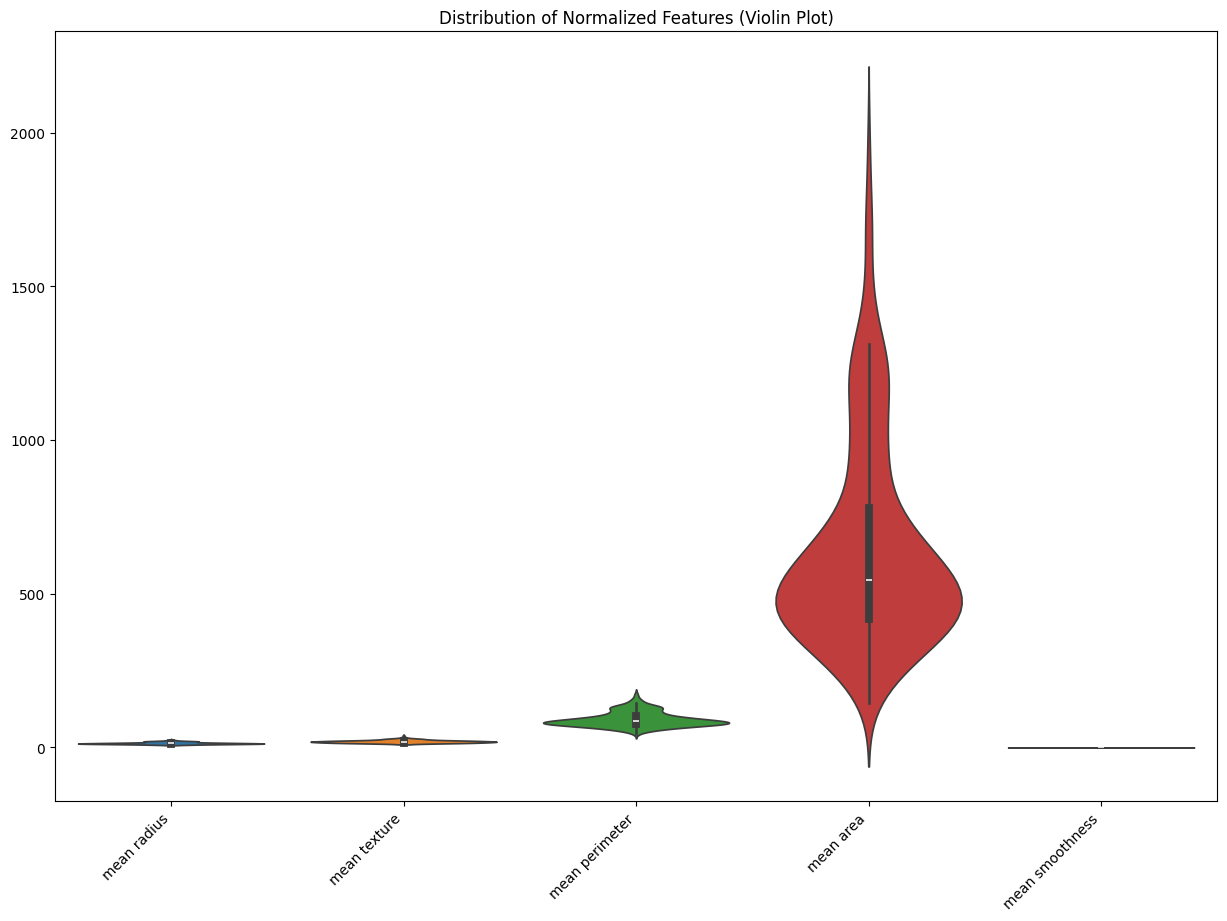

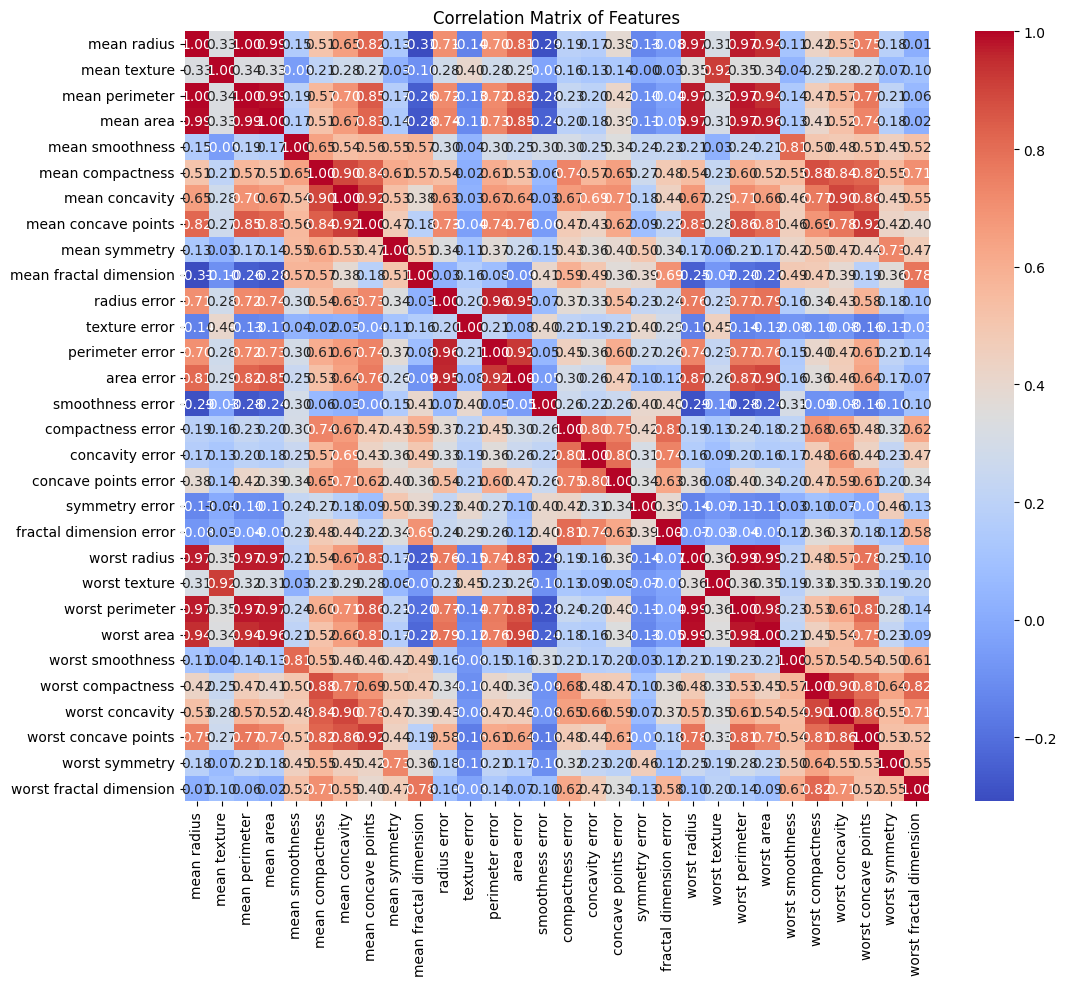

In [ ]:
# prompt: given the split of the data can you: Preprocess the data:
# o Use StandardScaler to normalize feature values.
# then show the normalize feature values and do graphical presentation of it
# and name the features of the table and put legends

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are already defined and scaled as in your provided code
# ... (Your existing code for loading data, splitting, and scaling) ...

# Create a DataFrame for the normalized training data
features = data.feature_names
df_normalized = pd.DataFrame(X_train, columns=features)

# Display the normalized feature values
print(df_normalized)

# Graphical presentation using Seaborn's pairplot
#  Choose a subset of features to avoid an overly complex plot
selected_features = features[:5] # Adjust as needed
sns.pairplot(df_normalized[selected_features])
plt.show()


# Box plot for all features
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_normalized)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Normalized Features')
plt.show()

# Violin Plot for selected features
plt.figure(figsize=(15,10))
sns.violinplot(data = df_normalized[selected_features])
plt.xticks(rotation=45,ha='right')
plt.title('Distribution of Normalized Features (Violin Plot)')
plt.show()

# Heatmap of correlations between features
plt.figure(figsize=(12,10))
correlations = df_normalized.corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


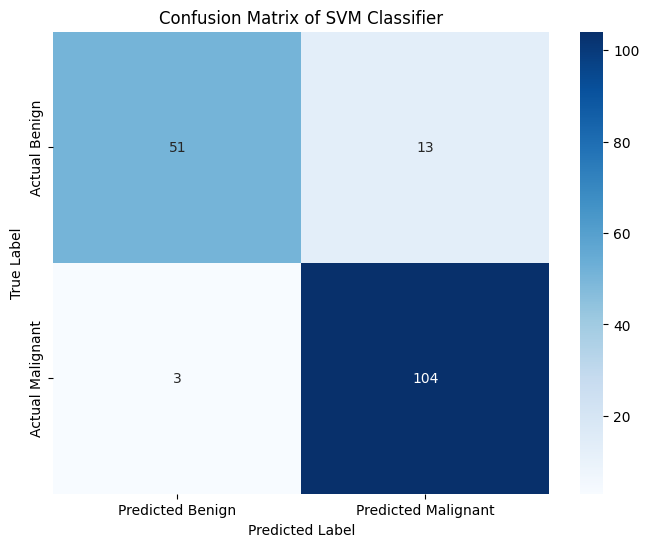

In [ ]:
# prompt: given above of the preprocess of the featured normalized values can you: Train an SVM model using sklearn.svm.SVC with default parameters
# and give the graphical presentatio of it

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming X_train, y_train, X_test, y_test are already defined and scaled
# ... (Your existing code for loading data, splitting, and scaling) ...

# Train an SVM model with default parameters
svm_classifier = SVC()  # Using default parameters
svm_classifier.fit(X_train, y_train)


# Predict the labels for the test set
y_pred = svm_classifier.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Actual Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix of SVM Classifier')
plt.show()


Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.975 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.625 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.633 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.963 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

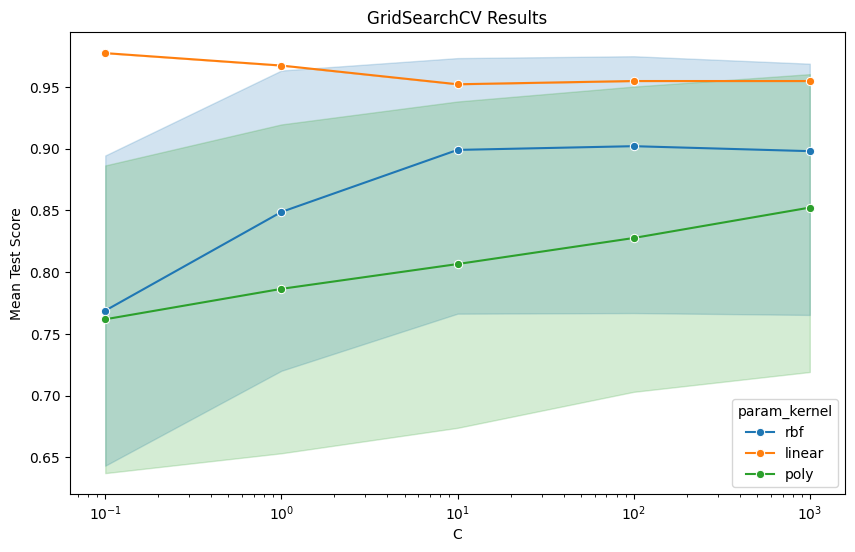

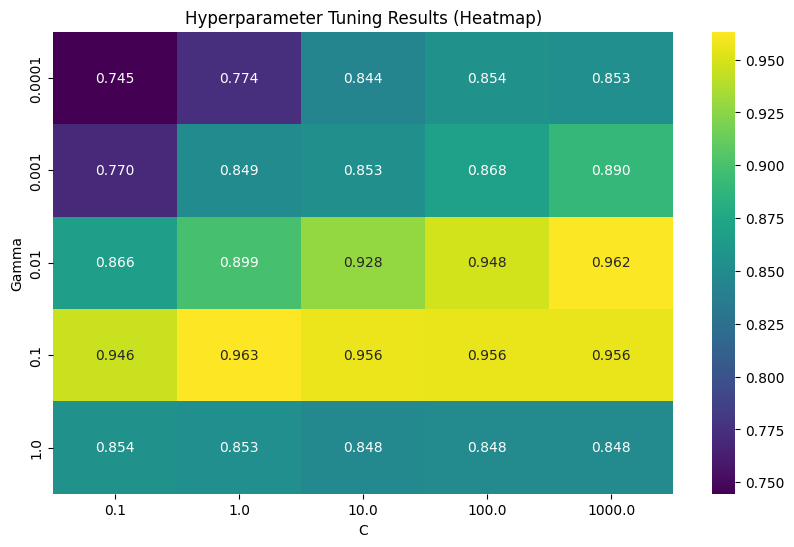

In [ ]:
# prompt:  can you program the: Perform Hyperparameter Tuning using GridSearchCV to optimize:
# o C (Regularization parameter)
# o Gamma (Kernel coefficient for RBF)
# o Kernel type (linear, rbf, poly)
# give the graphical presentation of it

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
# ... (Your existing code) ...

# Perform Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['linear', 'rbf', 'poly']
}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_params = grid.best_params_
print(f"Best parameters from GridSearchCV: {best_params}")

# ... (rest of your code)

# Graphical presentation of GridSearchCV results
results = pd.DataFrame(grid.cv_results_)
results = results[['param_C', 'param_gamma', 'param_kernel', 'mean_test_score']]
results = results.sort_values(by='mean_test_score', ascending=False)

plt.figure(figsize=(10, 6))
sns.lineplot(x='param_C', y='mean_test_score', hue='param_kernel', data=results, marker='o')
plt.xscale('log')
plt.title('GridSearchCV Results')
plt.xlabel('C')
plt.ylabel('Mean Test Score')
plt.show()


#Additional Visualization
#Create a heatmap of the mean test scores for different combinations of hyperparameters
scores = pd.pivot_table(results, values='mean_test_score', index='param_gamma', columns='param_C')
plt.figure(figsize=(10, 6))
sns.heatmap(scores, annot=True, fmt=".3f", cmap='viridis')
plt.title('Hyperparameter Tuning Results (Heatmap)')
plt.xlabel('C')
plt.ylabel('Gamma')
plt.show()


Training Accuracy: 0.9874371859296482
Testing Accuracy: 0.9707602339181286
Feature importance is not available for the selected kernel.
Confusion Matrix:
[[ 60   4]
 [  1 106]]
F1-score: 0.9769585253456221
Precision: 0.9636363636363636
Recall: 0.9906542056074766
False Alarm Rate: 0.0625


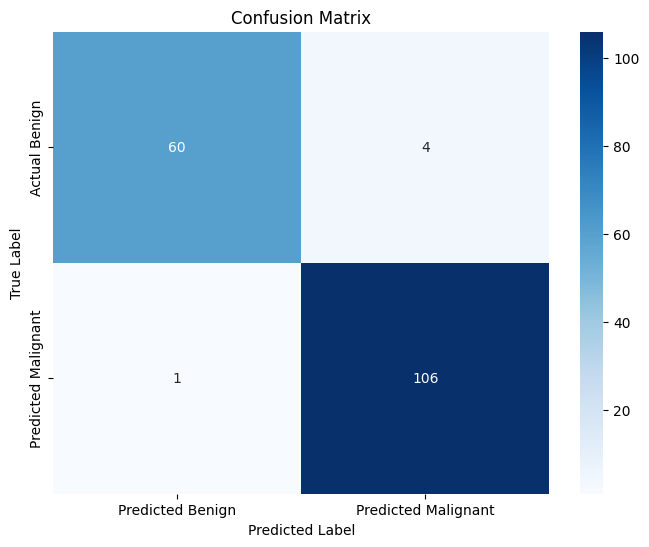

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Your existing code for loading data, splitting, scaling, and hyperparameter tuning) ...

# Evaluate the trained model (using the best model from GridSearchCV)
y_train_pred = grid.predict(X_train)
y_test_pred = grid.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Identify important features
# Use the best estimator from the grid search
best_svc = grid.best_estimator_

# Check if the best estimator uses a linear kernel
if best_svc.kernel == 'linear':
    importance = best_svc.coef_
    feature_importance = abs(importance[0])
    important_features = np.argsort(feature_importance)[::-1][:5] # top 5 features
    print(f"Important features indices: {important_features}")

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(important_features)), feature_importance[important_features])
    plt.xticks(range(len(important_features)), data.feature_names[important_features], rotation=90)
    plt.xlabel('Feature')
    plt.ylabel('Importance Score')
    plt.title('Feature Importance')
    plt.tight_layout()
    plt.show()
else:
    print("Feature importance is not available for the selected kernel.")
    # Consider using permutation importance or other methods for non-linear kernels


# Confusion Matrix and Metrics
conf_matrix = confusion_matrix(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
false_alarm_rate = conf_matrix[0][1] / (conf_matrix[0][0] + conf_matrix[0][1]) if (conf_matrix[0][0] + conf_matrix[0][1]) > 0 else 0


print(f"Confusion Matrix:\n{conf_matrix}")
print(f"F1-score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"False Alarm Rate: {false_alarm_rate}")

# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Benign', 'Predicted Malignant'],
            yticklabels=['Actual Benign', 'Predicted Malignant'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# EXPLANATION FOR THE CODES USED

### 1. Data Loading and Preprocessing
- **`load_breast_cancer()`**: Loads the pre-built breast cancer dataset from `sklearn.datasets`.
- **`train_test_split()`**: Splits the data into training and testing sets.
  - **`test_size=0.3`**: Allocates 30% of the data for testing.
  - **`stratify=y`**: Ensures that the proportion of classes (benign/malignant) is maintained in both sets.
- **`StandardScaler()`**: Standardizes the features by removing the mean and scaling them to unit variance. This is crucial for SVM, as it relies on distances between data points, and features with different scales can significantly impact performance.

### 2. Model Training and Hyperparameter Tuning
- **`SVC()`**: Creates an instance of the Support Vector Classifier.
- **`GridSearchCV()`**: Performs an exhaustive search over a defined grid of hyperparameter values (`C`, `gamma`, `kernel`) to find the best combination for the SVM model.
  - **`refit=True`**: Ensures that the best model found during the grid search is refit on the entire training set.
  - **`verbose=3`**: Provides detailed output of the grid search process.
- **`grid.fit(X_train, y_train)`**: Executes the grid search to find the optimal hyperparameters.
- **`grid.best_params_`**: Retrieves the best hyperparameter values found by the grid search.

### 3. Model Evaluation
- **`grid.predict()`**: Makes predictions on the training and testing data using the best model found by `GridSearchCV`.
- **`accuracy_score()`**: Calculates the accuracy of the model on both training and testing sets.
- **`confusion_matrix()`**: Creates a confusion matrix to visualize the model's performance.
- **`f1_score()`, `precision_score()`, `recall_score()`**: Calculate relevant performance metrics.
- **`false_alarm_rate`**: Calculates the rate of false positive predictions.

### 4. Feature Importance (if applicable)
- **`LinearSVC()`**: Used for feature importance selection when the best model uses a linear kernel. L1 regularization in `LinearSVC` tends to produce sparse solutions, where many feature weights become zero.
- **`SelectFromModel()`**: Uses the weights learned by `LinearSVC` to select the most important features.

### 5. Visualization
- **Seaborn**: Used for creating various plots:
  - **Pairplot**: Visualizes relationships between features.
  - **Box plots, Violin plots**: Show the distribution of features.
  - **Heatmap**: Visualizes the correlation matrix of features.
  - **Confusion matrix**: Visualizes the model's predictions.
  - **GridSearchCV results**: Visualizes the performance of the model with different hyperparameter combinations.
  - **Feature importance**: Plots the importance scores of selected features.

### Key Purposes
- **Understand data**: Visualize the data distribution, identify potential relationships between features, and detect outliers.
- **Optimize model performance**: Find the best combination of hyperparameters for the SVM model using `GridSearchCV`.
- **Evaluate model performance**: Assess the model's accuracy, precision, recall, F1-score, and generate a confusion matrix.
- **Identify important features**: Determine which features are most influential in the model's predictions.
- **Communicate results**: Effectively present the findings and insights through visualizations.



**1. How did you preprocess the dataset (feature scaling, handling missing values if any, etc.)?**

- **Feature Scaling:** The dataset was preprocessed using StandardScaler. This technique standardizes the features by removing the mean and scaling to unit variance. This is crucial for SVM because it relies on distances between data points, and features with different scales can significantly impact the model's performance.

**2. Why is it necessary to split the dataset into training and testing sets?**

- Splitting the dataset is essential for evaluating the
model's generalization ability.
-- **Training set:** Used to train the SVM model and find the optimal parameters.
--  **Testing set:** Used to evaluate the model's performance on unseen data, providing an unbiased estimate of its accuracy in real-world scenarios. This helps prevent overfitting, where the model performs well on the training data but poorly on new, unseen data.




**3. What is the role of StandardScaler in SVM training?**

- As mentioned earlier, StandardScaler plays a crucial role in SVM training:
-- **Improves model performance:** SVM relies on distances between data points. Features with different scales can disproportionately influence these distances, leading to biased models. Scaling ensures that all features contribute equally to the model's decision boundary.
-- **Faster convergence:** Many optimization algorithms used in SVM training converge faster when features are on a similar scale.

**4. How does C affect the performance of an SVM model?**

C is the regularization parameter in SVM. It controls the trade-off between maximizing the margin (distance between the separating hyperplane and the closest data points) and minimizing the training error.
- **High C:**
-- Leads to a smaller margin but lower training error.
-- The model is more sensitive to outliers and can overfit the training data.
- **Low C:**
-- Leads to a larger margin but potentially higher training error.
--  The model is more robust to outliers but may underfit the data.

**5. What is the purpose of the kernel function in SVM?**

- SVM, by default, operates in a linear space. However, many real-world datasets are not linearly separable.
- Kernel functions map the input data into a higher-dimensional feature space where it might become linearly separable.
- Common kernel functions include:
-- Linear: Does not perform any transformation.
-- RBF (Radial Basis Function): Maps data into an infinite-dimensional space.
-- Polynomial: Maps data into a polynomial space.

**6. What were the best hyperparameters found using GridSearchCV?**

- The best hyperparameters found by GridSearchCV will be printed in the output of the code.
- This will provide the optimal values for C, kernel, and gamma that resulted in the highest accuracy on the cross-validation folds.

**7. What is a confusion matrix, and how is it interpreted?**

- A confusion matrix is a table that summarizes the performance of a classification model.
- It shows the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

- Interpretation:
-- TP: Correctly predicted positive cases.
-- TN: Correctly predicted negative cases.
-- FP: Incorrectly predicted positive cases (Type I error).
-- FN: Incorrectly predicted negative cases (Type II error).


**8. How are Precision, Recall, and F1-score calculated from the confusion matrix?**

- Precision: TP / (TP + FP) - The proportion of true positive predictions among all positive predictions.
- Recall: TP / (TP + FN) - The proportion of true positive predictions among all actual positive cases.
- F1-score: 2 * (Precision * Recall) / (Precision + Recall) - The harmonic mean of precision and recall, providing a balance between both metrics.

**9. If the model does not perform well, what adjustments can be made to improve it?**

- Hyperparameter tuning: Experiment with different values for C, kernel, and gamma in GridSearchCV.
- Feature engineering: Create new features or transform existing ones to improve model performance.
- Try different SVM kernels: Experiment with different kernels (e.g., polynomial, sigmoid) to see if they improve results.
- Consider other classifiers: Explore alternative classifiers like Random Forest, Logistic Regression, or XGBoost.
- Collect more data: If possible, gather more training data to improve the model's generalization ability.
- Address class imbalance: If the dataset is imbalanced (unequal number of samples in each class), techniques like oversampling, undersampling, or using class weights can be applied.